# Baltimore Traffic Violations
Springboard Data Science Career Track

Capstone Project 1

Tamara Monge


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [2]:
# Import the dataset
df = pd.read_csv ('Documents/Data Science Course/Capstone1/Parking_Citations.csv')

/Users/tami/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Examine the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345053 entries, 0 to 1345052
Data columns (total 21 columns):
Citation           1345053 non-null int64
Tag                1344837 non-null object
ExpMM              1300960 non-null object
ExpYY              1345047 non-null float64
State              1345053 non-null object
Make               1343712 non-null object
Address            1345051 non-null object
ViolCode           1344668 non-null float64
Description        1345053 non-null object
ViolFine           1344668 non-null object
ViolDate           1340590 non-null object
Balance            1345053 non-null object
PenaltyDate        0 non-null float64
OpenFine           1344668 non-null object
OpenPenalty        1344668 non-null object
NoticeDate         602001 non-null object
ImportDate         1345053 non-null object
Neighborhood       206670 non-null object
PoliceDistrict     206670 non-null object
CouncilDistrict    206691 non-null float64
Location           1323450 non-nul

In [4]:
# Examine the head
df.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,79764791,9RX368,00,11.0,WV,INFIN,6000 CHINQUAPIN PKWY,19.0,Exceeding 48 Hours,$32.00,...,$332.00,NaN,$32.00,$300.00,10/31/2011,05/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"6000 CHINQUAPIN PKWY\nBaltimore, MD\n(39.36509..."
1,79799128,00T058,06,11.0,MD,GMC,O/S 3600 GLENGYLE AVENUE,22.0,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,01/04/2012,08/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"3600 GLENGYLE AVENUE\nBaltimore, MD\n(39.36725..."
2,79741567,6926L6,03,13.0,MD,FORD,1000 VINE ST,18.0,All Other Parking Meter Violations,$32.00,...,$357.00,NaN,$32.00,$325.00,10/19/2011,05/09/2013 04:03:00 AM +0000,NaN,NaN,NaN,"1000 VINE ST\nBaltimore, MD\n(39.290402, -76.6..."
3,79751210,1FZL87,05,10.0,MD,HOND,4200 CONNECTICUT AVE,22.0,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,08/31/2011,05/07/2013 10:41:00 AM +0000,Irvington,Southwestern,8.0,"4200 CONNECTICUT AVE\nBaltimore, MD\n(39.28429..."
4,79751160,TW2578,SEP,10.0,VA,MERC,4640 COLEHERNE RD,22.0,Expired Tags,$32.00,...,$332.00,NaN,$32.00,$300.00,12/29/2011,07/09/2013 04:02:00 AM +0000,NaN,NaN,NaN,"4640 COLEHERNE RD\nBaltimore, MD\n(39.294882, ..."


In [5]:
# Examine the shape
df.shape

(1345053, 21)

# Data Cleaning

For initial data cleaning we need to:
1. convert data types:
     - convert the following series from strings to floats: fine, balance, open_fine, and open_penalty
     - convert the following series  to strs, so can later convert to datetime: license_mo (which has some values as letters), license_yr, 
     - convert the following series from strings to date-time objects: license_mo + license_yr = license_exp, viol_date, notice_date, and import_date
     - convert the following series to categorical objects: make, state, code
     - convert the following series to either all number codes or all string descriptors: police_district (which has some values as letters) and council_district (which has some values as letters)

2. determine column contents:
    - the difference between address and location (are they ever different?)
    - the difference between date and import_date (are they ever different?)
    - are there any non-null values in penalty_date?

3. determine whether the contents of description are categorical or if two descriptions of the same crime can vary?

4. determine how to handle the null values in each column:

In [6]:
# Assign each column to its own series of the appropriate data type, so we can more easily plot and work with the data.
# 1.a. floats
fine = df['ViolFine'][df['ViolFine'].apply(type) == str].apply(lambda x: x[1:]).astype(float)   
balance = df['Balance'][df['Balance'].apply(type) == str].apply(lambda x: x[1:]).astype(float)   
open_fine = df['OpenFine'][df['OpenFine'].apply(type) == str].apply(lambda x: x[1:]).astype(float)   
open_penalty = df['OpenPenalty'][df['OpenPenalty'].apply(type) == str].apply(lambda x: x[1:]).astype(float)    

# 1.b. strs
license_yr = df['ExpYY'][df['ExpYY'].notnull()].apply(lambda x: int(x)).astype(str) 
license_mo = df['ExpMM'][df['ExpMM'].notnull()].astype(str) 
viol_date = df['ViolDate'] #str  '%m/%d/%Y %I:%M:%S %p'
notice_date = df['NoticeDate'] #str  '%m/%d/%Y'
import_date = df['ImportDate'] #str  '%m/%d/%Y %I:%M:%S %p +0000'

# 1.c  categorical
make = df['Make'].astype('category')
state = df['State'].astype('category')    
code = df['ViolCode'].astype('category')#float   

# no change to data type
citation = df['Citation'] #int 
license = df['Tag'] #str   
address = df['Address'] #str  
description = df['Description'] #str  
penalty_date = df['PenaltyDate'] #float  ===> no values
neighborhood = df['Neighborhood'] #float   
police_district = df['PoliceDistrict'] #float  
council_district = df['CouncilDistrict']  #float  
location = df['Location'] #str  

In [7]:
# 1.d. datetime objects 
# license_exp datetime object
license_exp = license_mo + '/20' + license_yr
license_exp = datetime.strptime(license_exp[3], '%m/%Y')  # This does not work for the whole series (1) some months are reported as [00, NaN, or SEP], and (2) strptime only works with strings, not series, and cant get comprehension to work
#license_exp, tz = pd.to_datetime(license_exp, format = '%m/%Y')
# notice_date datetime object
notice_date = datetime.strptime(notice_date[0], '%m/%d/%Y') # Again, this does not work for the whole series since strptime only works with strings, not series, and cant get comprehension to work
#notice_date = pd.to_datetime(notice_date, '%m/%d/%Y')
# import_date datetime object 
##import_date = datetime.strptime(import_date[0], '%m/%d/%Y %I:%M:%S %p +0000') # Again, this does not work for the whole series since strptime only works with strings, not series, and cant get comprehension to work
#import_date = pd.to_datetime(import_date, '%m/%d/%Y %I:%M:%S %p +0000')

In [8]:
license_exp

datetime.datetime(2010, 5, 1, 0, 0)

In [9]:
# 1.e  map all to number codes or string descriptors...will need to use external datasets in order to determine the mapping 


In [10]:
# 2.a determine the difference between address and location

In [11]:
# 2.b determine the difference between viol_date and import_date
viol_date[10]
import_date[10]

'09/15/2017 04:02:00 AM +0000'

viol_date is the date the citation was issued. import_date seems to be an artifact (year is not within the range of the dataset). Thus, from here on out we will use viol_date and ignore import_date

In [12]:
# 2.c remove column PenaltyDate since it contains only NaNs

In [13]:
# 3  determine whether description can be treated as categorical

In [14]:
# 4.a check for nulls 
df[:].isnull().sum()

Citation                 0
Tag                    216
ExpMM                44093
ExpYY                    6
State                    0
Make                  1341
Address                  2
ViolCode               385
Description              0
ViolFine               385
ViolDate              4463
Balance                  0
PenaltyDate        1345053
OpenFine               385
OpenPenalty            385
NoticeDate          743052
ImportDate               0
Neighborhood       1138383
PoliceDistrict     1138383
CouncilDistrict    1138362
Location             21603
dtype: int64

The only complete columns are: Citation, State, Description, Balance, and ImportDate

In [15]:
# 4.b determine how to handle NaNs

# Visual & Statistical EDA

# Let's begin with the Violation Codes and Descriptions

/Users/tami/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/tami/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


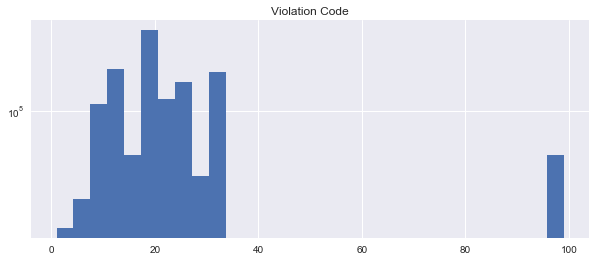

In [16]:
fig=plt.figure(figsize=(10, 4))
plt.hist(code, range=[1,99], bins=30)
plt.title('Violation Code')
plt.yscale('log')
plt.show()

In [17]:
code.value_counts().sort_values(ascending=False).count()

30

In [18]:
code.value_counts().sort_values(ascending=False).head(10)

18.0    367695
27.0    154683
32.0    132630
22.0    122531
12.0    117114
8.0     108809
11.0     83359
33.0     49148
99.0     47073
30.0     32964
Name: ViolCode, dtype: int64

- The most common violation code, by more than a factor of 2, is 18 (367,695). 
- 30 violation codes occurred in the past 2 years.
- 7 codes had more than 100,000 occurences in the past 2 years: 18, 27, 32, 22, 12, and 8. Later, we will find the descriptions associated with these codes.

In [19]:
description[description.notnull()].unique()

array(['Exceeding 48 Hours', 'Expired Tags',
       'All Other Parking Meter Violations',
       'All Other Stopping or Parking Violations', 'Red Light Violation',
       'Passenger Loading Zone', 'Fixed Speed Camera',
       'Obstruct/Impeding Movement of Pedestrian',
       'No Stopping/Standing Not Tow-Away Zone',
       'No Stopping//Parking Stadium Event Camden', 'Abandonded Vehicle',
       'No Stop/Park Handicap', 'No Stop/Park Street Cleaning',
       'Mobile Speed Camera', 'Obstruct/Impeding Flow of Traffic',
       'Residential Parking Permit Only',
       'No Stopping/Standing Tow Away Zone',
       'Less Than 15 feet from Fire Hydrant',
       'Fire Lane/Handicapped Violation', 'Right on Red',
       'In Transit Zone/Stop', 'In Taxicab Stand',
       'Blocking Garage or Driveway',
       'Commercial Veh/Residence under 20,000 lbs',
       'Less 30’ from Intersection',
       'No Stopping or No Parking Pimlico Event',
       'Commercial Veh/Residence over 20,000 lbs',
      

In [20]:
description.describe()

count                                1345053
unique                                    30
top       All Other Parking Meter Violations
freq                                  367802
Name: Description, dtype: object

- There are 30 unique violation descriptions. 
- The most common violation is "All Other Parking Meter Violations," coming in at 367,802 occurences (~27%)

# Now, let's examine the Vehicle Characteristics: make and license state

In [21]:
unique_makes = make[make.notnull()].unique()
print(unique_makes)
cat_make = pd.Categorical(make, unique_makes, ordered=False)
unique_makes.describe()

[INFIN, GMC, FORD, HOND, MERC, ..., VANDU, STRG, BRMR, CROWN, AMC H]
Length: 1027
Categories (1027, object): [INFIN, GMC, FORD, HOND, ..., STRG, BRMR, CROWN, AMC H]


,counts,freqs
categories,,
INFIN,1,0.000974
GMC,1,0.000974
FORD,1,0.000974
HOND,1,0.000974
MERC,1,0.000974
DETAC,1,0.000974
DODG,1,0.000974
ACURA,1,0.000974
TOYOT,1,0.000974


In [22]:
make[make.notnull()].describe()

count     1343712
unique       1027
top          FORD
freq       150351
Name: Make, dtype: object

- There are 1027 car makes
- The most common make to receive violations is Ford, coming in at 150,351 violations (~11%)

- Need to remove and sum all duplicates in makes (ex., HOND and HONDA) (maybe only go out to 3 or 4 characters)
- How to plot the categorical data?

In [23]:
150351/1343712

0.11189228048867614

In [24]:
unique_states = state[state.notnull()].unique()
print(unique_states)
cat_state = pd.Categorical(state, unique_states, ordered=False)
unique_states.describe()

[WV, MD, VA, TN, PA, ..., NT, SE, MX, YT, YU]
Length: 102
Categories (102, object): [WV, MD, VA, TN, ..., SE, MX, YT, YU]


,counts,freqs
categories,,
WV,1,0.009804
MD,1,0.009804
VA,1,0.009804
TN,1,0.009804
PA,1,0.009804
DE,1,0.009804
WA,1,0.009804
FL,1,0.009804
NY,1,0.009804


In [25]:
state[state.notnull()].describe()

count     1345053
unique        102
top            MD
freq      1120119
Name: State, dtype: object

- There are 102 license plate states - need to investigate where others are coming from (canada?)
- The most common state to receive violations is MD, coming in at 1,120,119 violations (~83%); not surprising
- How to plot the categorical data?

In [26]:
1120119/1345053

0.8327694150342031

In [27]:
# cat_make.value_counts().plot(kind='hist')
plt.hist(cat_state)
plt.title('State of License Plate')
plt.yscale('log')
plt.show()

ValueError: object __array__ method not producing an array

# Now let's look at the Financial data

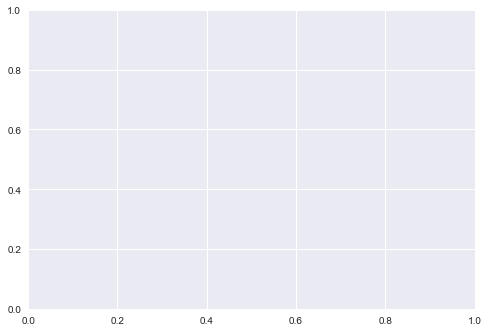

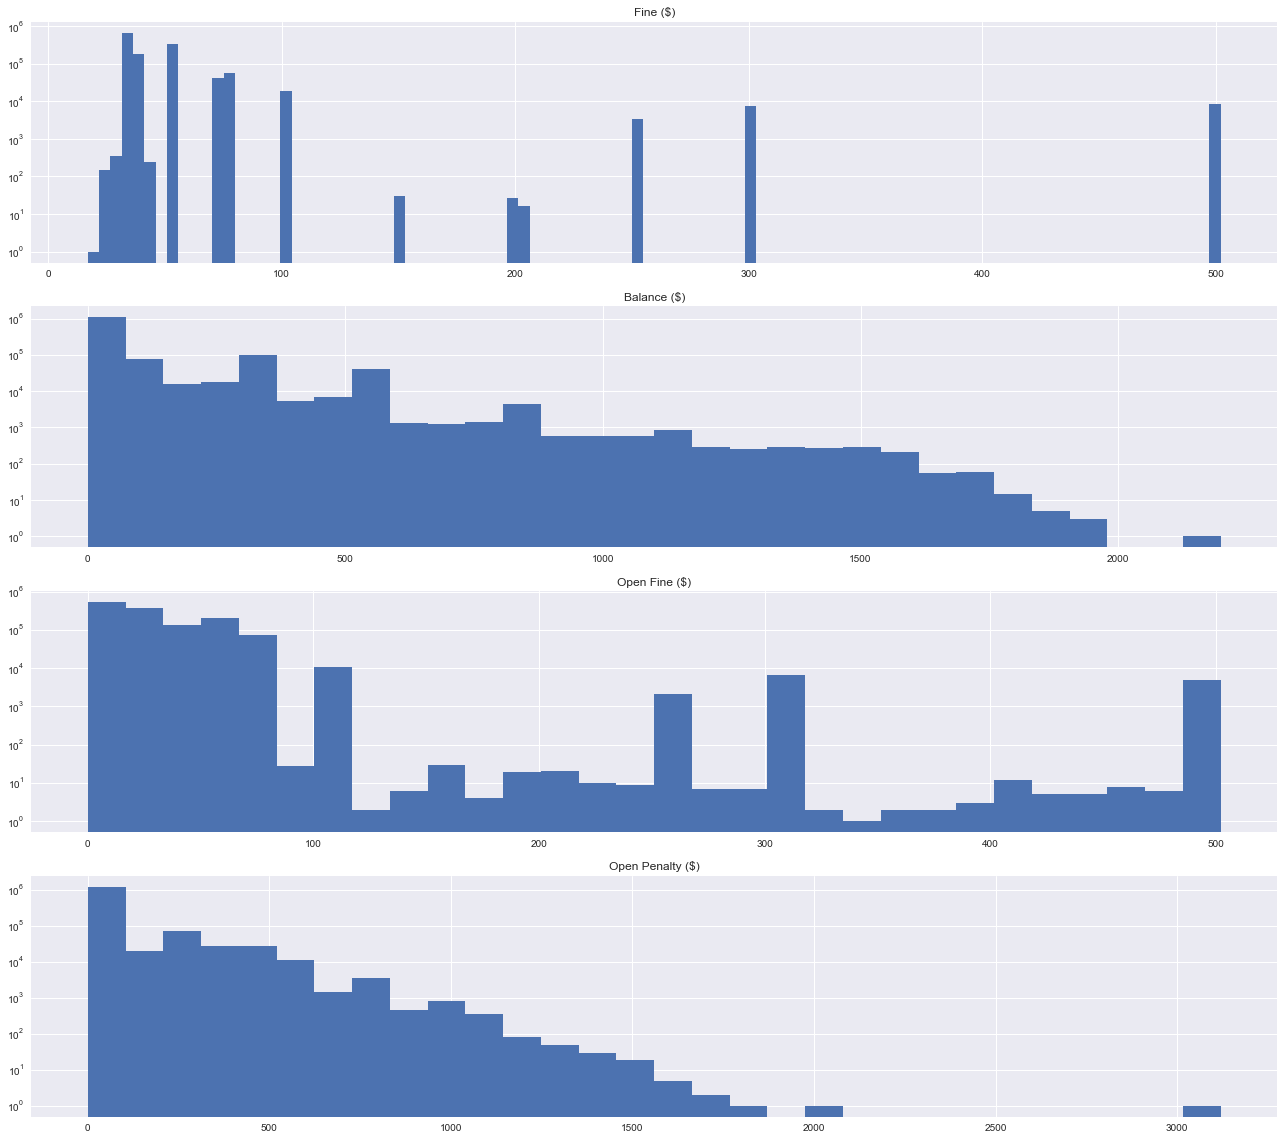

In [28]:
fig=plt.figure(figsize=(18, 16))

plt.subplot(4,1,1)
plt.hist(fine, bins=100)
plt.title('Fine ($)')
plt.yscale('log')

plt.subplot(4,1,2)
plt.hist(balance, bins=30)
plt.title('Balance ($)')
plt.yscale('log')

plt.subplot(4,1,3)
plt.hist(open_fine, bins=30)
plt.title('Open Fine ($)')
plt.yscale('log')

plt.subplot(4,1,4)
plt.hist(open_penalty, bins=30)
plt.title('Open Penalty ($)')
plt.yscale('log')

plt.tight_layout()
plt.show()

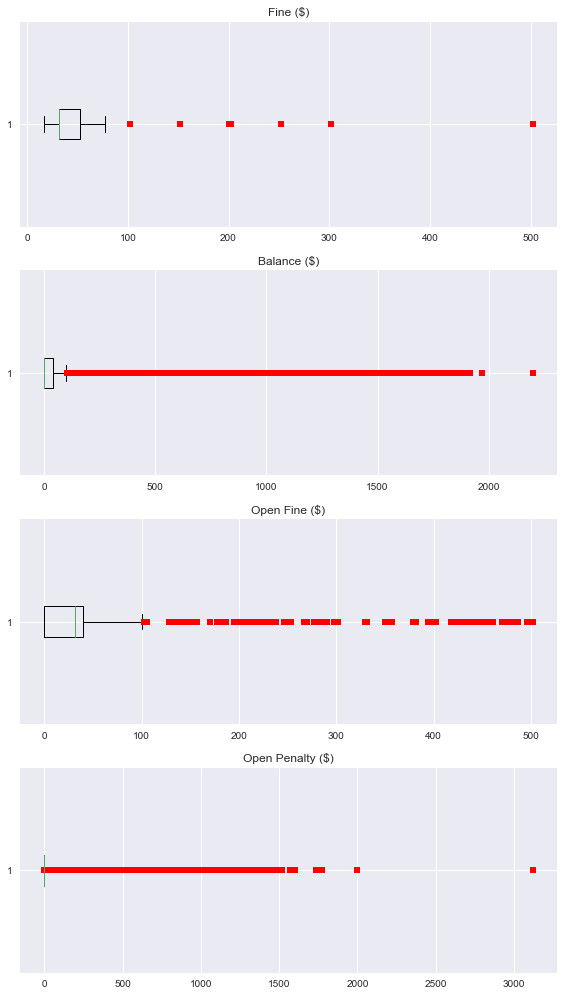

In [29]:
fig=plt.figure(figsize=(8, 14))

plt.subplot(4,1,1)
plt.boxplot(fine, 0, 'rs', 0)
plt.title('Fine ($)')

plt.subplot(4,1,2)
plt.boxplot(balance, 0, 'rs', 0)
plt.title('Balance ($)')

plt.subplot(4,1,3)
plt.boxplot(open_fine, 0, 'rs', 0)
plt.title('Open Fine ($)')

plt.subplot(4,1,4)
plt.boxplot(open_penalty, 0, 'rs', 0)
plt.title('Open Penalty ($)')

plt.tight_layout()
plt.show()

In [30]:
fine.describe()

count    1.344668e+06
mean     4.752689e+01
std      4.478511e+01
min      1.700000e+01
25%      3.200000e+01
50%      3.200000e+01
75%      5.200000e+01
max      5.020000e+02
Name: ViolFine, dtype: float64

In [31]:
(fine == 32).sum()/fine.count()*100

50.384630258175257

- The median fine is \$32
- 50% of fines are exactly \$32 .
- 75% of fines are \$52 or less. 
- Significant outliers pull the mean up to \$47.5 
- The maximum fine is \$502 and the minimum \$17.

In [32]:
balance.describe()

count    1.345053e+06
mean     7.400970e+01
std      1.578945e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+01
max      2.199000e+03
Name: Balance, dtype: float64

In [33]:
(balance == 0).sum()/balance.count()*100

57.738170912224277

- The median balance is \$0
- The minimum balance is \$0
- 58% of balances are \$0 -- have been paid.
- 75% of balances are \$40 or less -- likely only one violation.
- The maximum balance is \$2,199.

In [34]:
open_fine.describe()

count    1.344668e+06
mean     2.941512e+01
std      4.274848e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.200000e+01
75%      4.000000e+01
max      5.020000e+02
Name: OpenFine, dtype: float64

In [35]:
(open_fine == 0).sum()/open_fine.count()*100

39.394036297435505

- The median open fine is \$32 -- this is the same as the median fine, further suggesting most accounts have only one violation.
- The maximum open fine is \$502 -- this is the same as the maximum fine, suggesting the account with the maximum fine had only one violation.
- The minimum open fine is \$0 -- this is the same as the minimum balance, not surprising. 
- 39% of open fines are \$0 -- have been paid. 
- 75% of open fines fall at or below \$40.

In [36]:
open_penalty.describe()

count    1.344668e+06
mean     4.398455e+01
std      1.254209e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.120000e+03
Name: OpenPenalty, dtype: float64

In [37]:
(open_penalty == 0).sum()/open_penalty.count()*100

84.617764384963422

- 84% of open penalties are \$0 -- suggesting most accounts either paid on time or have already paid off their penalties
- The maximum open penalty is \$3,120. 

# Now, let's look at the Geographical Data: police district, council district, neighborhood, address, and location

In [38]:
police_district.describe()

count           206670
unique              18
top       Southeastern
freq             34563
Name: PoliceDistrict, dtype: object

In [39]:
police_district.unique()

array([nan, 'Southwestern', 'Western', 'Southeastern', 'Northwestern',
       'Northern', 'Southern', 'Central', 'Notheastern', 'Eastern',
       'NORTHERN', 'SOUTHEASTERN', 'WESTERN', 'NORTHEASTERN', 'SOUTHERN',
       'NORTHWESTERN', 'EASTERN', 'SOUTHWESTERN', 'CENTRAL'], dtype=object)

Need to recalculate the stats after compressing and summing the similar districts.

In [40]:
council_district.describe()

count    206691.000000
mean          8.353121
std           4.376684
min           1.000000
25%           5.000000
50%          11.000000
75%          11.000000
max          14.000000
Name: CouncilDistrict, dtype: float64

This is nonsensical...lets try again after converting to a categorical'

In [41]:
council_district.unique()

array([ nan,   8.,   9.,   1.,   7.,  12.,  10.,  11.,  13.,   4.,   3.,
         6.,  14.,   5.,   2.])

In [42]:
neighborhood.describe()

count           206670
unique             498
top       Federal Hill
freq             13526
Name: Neighborhood, dtype: object

In [43]:
address.describe()

count                            1345051
unique                             65862
top       2600 BLOCK OF GWYNNS FALLS PKW
freq                               11234
Name: Address, dtype: object

In [44]:
location.describe()

count                                               1323450
unique                                                59521
top       2600 BLOCK OF GWYNNS FALLS\nPKW Baltimore, MD\...
freq                                                  11234
Name: Location, dtype: object

# Other stuff for later

In [ ]:
# Print the rows where the ViolationFine is not a string
df[df['ViolFine'].apply(type) != str].head()

In [ ]:
# Explore the meaning of Open Fine, Open Penalty, and their relation to multiple citations for a single License '4AB9753'
df[df['Tag'] == '4AB9753']